In [1]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Set data set directory strings to variables
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read dataset csv's into dataframe
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Display mouse data
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [2]:
# Display study data
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [3]:
print(mouse_metadata["Mouse ID"].nunique())
print(study_results["Mouse ID"].nunique())

249
249


In [4]:
# Merge data to attribute Drug Regimen to Tumor Volume
mergeData = pd.merge(study_results, mouse_metadata, on = "Mouse ID", how = "left")
mergeData
#mergeData.sort_values(["Mouse ID", "Timepoint"])

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [5]:
mergeData["Mouse ID"].nunique()

249

In [56]:
# Use .duplicated to view duplicates across Mouse ID and timepoints series in mergeData
mergeDataDupe = mergeData[mergeData.duplicated(subset = ["Mouse ID","Timepoint"], keep = False)]
mergeDataDupe.sort_values(by = "Mouse ID").head(50).tail(50)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [57]:
# Duplicates found in dataset
# Use .drop_duplicates across "Mouse ID","Timepoint" and keep only one value
#mergeDataClean = mergeData.drop_duplicates(subset = ["Mouse ID","Timepoint"],keep = False)
#MAKE "g989" VARIABLE
mergeDataClean = mergeData[mergeData["Mouse ID"] != "g989"]


# Recheck for duplicates
mergeDataCleanChk = mergeDataClean[mergeDataClean.duplicated(subset = ["Mouse ID","Timepoint"], keep = False)]
mergeDataCleanChk.sort_values(by = "Mouse ID").head(50).tail(50)
print(mergeDataCleanChk)

# Check that the number of Mouse IDs is the same as original count
print(f'{mergeDataClean["Mouse ID"].nunique() == study_results["Mouse ID"].nunique()}')

Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []
False


In [58]:
mergeDataClean["Mouse ID"].nunique()

248

In [59]:
mergeDataClean.loc[(mergeDataClean["Mouse ID"] == "g989"),:]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


In [60]:
mergeDataClean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [61]:
#Final Review
    # 1893 rows × 8 columns
    # No Null values
    # Data types OK
    # Values OK
    # No duplicate Mouse IDs with duplicate timepoints in mergeDataClean
    # Use mergeDataClean as the dataset
# OK to proceed with calculations

In [62]:
# Generate a summary statistics table consisting of the following stats on the tumor 
#     volume for each drug regimen:
# Separate the Tumor Vol and Drug Regimen
tumorVoldf = mergeDataClean.loc[:,["Tumor Volume (mm3)","Drug Regimen"]]

# Group by the drug regimen
drugTumorGroups = tumorVoldf.groupby("Drug Regimen")
# Find mean
drugMeanSer = drugTumorGroups.mean()
# Find Median
drugMedSer = drugTumorGroups.median()
# Find Variance
drugVarSer = drugTumorGroups.var(ddof = 0)
# Find Standard Deviation
drugSTDSer = drugTumorGroups.std(ddof = 0)
# Find SEM
drugSEMSer = drugTumorGroups.sem(ddof=0)

# Assemble summary table
summaryStatsdf = pd.DataFrame({"Mean":drugMeanSer.iloc[:,0], 
                             "Median":drugMedSer.iloc[:,0],
                             "Variance":drugVarSer.iloc[:,0],
                             "St Dev":drugSTDSer.iloc[:,0],
                             "SEM":drugSEMSer.iloc[:,0]
                            })
# Format summary table
summaryStatsdf["Mean"] = summaryStatsdf["Mean"].map("{:,.3f}".format)
summaryStatsdf["Median"] = summaryStatsdf["Median"].map("{:,.3f}".format)
summaryStatsdf["Variance"] = summaryStatsdf["Variance"].map("{:,.3f}".format)
summaryStatsdf["St Dev"] = summaryStatsdf["St Dev"].map("{:,.3f}".format)
summaryStatsdf["SEM"] = summaryStatsdf["SEM"].map("{:,.3f}".format)
summaryStatsdf

,Mean,Median,Variance,St Dev,SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.839,4.984,0.329
Ceftamin,52.591,51.776,39.069,6.251,0.468
Infubinol,52.885,51.821,42.886,6.549,0.491
Ketapril,55.236,53.699,68.189,8.258,0.602
Naftisol,54.332,52.509,65.818,8.113,0.595
Placebo,54.034,52.289,60.830,7.799,0.580
Propriva,52.321,50.446,43.556,6.600,0.542
Ramicane,40.217,40.673,23.384,4.836,0.320
Stelasyn,54.233,52.432,59.122,7.689,0.572


In [13]:
#print(drugTumorGroups.mean())
#print(drugTumorGroups.median())
#print(drugTumorGroups.var())
#print(drugTumorGroups.std(ddof = 0))
#print(drugTumorGroups.sem(ddof = 0))

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64


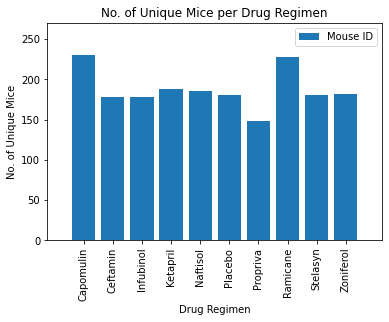

In [14]:
# Create and display bar plot for total number of measurements for each regimen as instructed by the
# grading rubric.
# DataFrame.plot() version

# Get count values
drugGroups = mergeDataClean.groupby("Drug Regimen")
countValues = drugGroups["Mouse ID"].count()
print(countValues)
#print(yValues.loc[:,0])   #DELETE

drugMeasureChart = countValues.plot(kind = "bar", width = 0.8, title = "No. of Unique Mice per Drug Regimen")
drugMeasureChart.set_ylabel("No. of Unique Mice")
plt.legend()
plt.xticks(rotation = 90)
plt.xlim(-1.25, len(np.arange(len(drugGroups))) + .25)
plt.ylim(0, max(countValues) + 40)
plt.show()

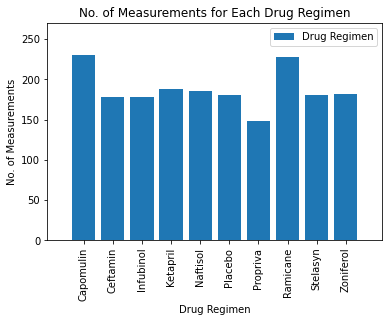

In [15]:
#pyplot version
# Get count values
xValues = countValues.index
yValues = countValues

# Plot graph
plt.bar(xValues, yValues, width=0.8)

# Format graph
plt.xticks(rotation = 90)
plt.title("No. of Measurements for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("No. of Measurements")
plt.xlim(-1.25, len(np.arange(len(yValues.index))) + .25)
plt.ylim(0, max(yValues) + 40)
plt.legend([yValues.index.name], loc = "best")
plt.show()

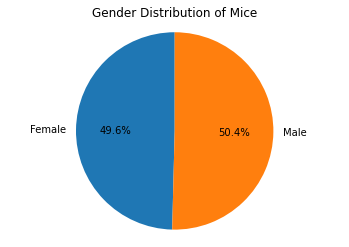

In [16]:
# Create and display pie plot for total number of mice per gender
# DataFrame.plot() version

# Get count values
genderGroups = mergeDataClean.groupby("Sex")
genderCountValues = genderGroups["Mouse ID"].nunique()

#print(genderCountValues)
femaleCount = genderCountValues["Female"]
maleCount = genderCountValues["Male"]
labels = genderCountValues.index


genderChart = genderCountValues.plot(kind="pie", autopct="%1.1f%%", shadow=False,startangle=90, title="Gender Distribution of Mice")

#plt.pie(genderCountValues, labels = labels, autopct="%1.1f%%", shadow=False, startangle=90)
plt.axis("equal")
plt.xlabel("")
plt.ylabel("")
# colors "lightskyblue"
plt.show()

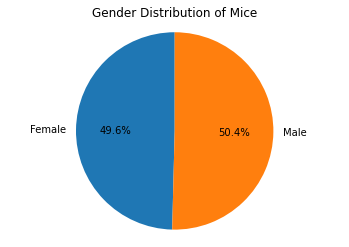

In [17]:
# Create and display pie plot for total number of mice per gender
# pyplot version

#print(genderCountValues)


plt.pie(genderCountValues, labels = labels, autopct="%1.1f%%", shadow=False,startangle=90)
plt.title("Gender Distribution of Mice")
plt.xlabel("")
plt.ylabel("")
plt.axis("equal")
plt.show()

In [18]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: 
# Capomulin, Ramicane, Infubinol, and Ceftamin. 
# Calculate the quartiles and IQR and quantitatively determine if there are any potential 
# outliers across all four treatment regimens.
topTreatmentsdf = mergeDataClean.loc[(mergeDataClean["Drug Regimen"] == "Capomulin") | 
                                      (mergeDataClean["Drug Regimen"] == "Ramicane") | 
                                      (mergeDataClean["Drug Regimen"] == "Infubinol") | 
                                      (mergeDataClean["Drug Regimen"] == "Ceftamin")
                                     ,:]
# Find the final timepoint for all mice
topTreatmentGroup = topTreatmentsdf.groupby("Mouse ID")
maxTime = topTreatmentGroup["Timepoint"].max()
# Attach the Tumor Volume to those Mice and Timepoints by inner joining on both series to "filter out"
#all other entries
finalTumordf = pd.merge(maxTime, mergeDataClean, on=["Mouse ID", "Timepoint"], how="inner")
finalTumordf = finalTumordf.rename(columns = {"Tumor Volume (mm3)":"Final Tumor Volume"})
finalTumordf


,Mouse ID,Timepoint,Final Tumor Volume,Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [19]:
# Calculate quartiles and IQRs for all treatment regimens

# Capomulin
capdf = finalTumordf.loc[(finalTumordf["Drug Regimen"] == "Capomulin"),["Final Tumor Volume"]]
print(f'Capomulin')
print(f'--------------------------------')
capQrtl = capdf["Final Tumor Volume"].quantile([.25,.5,.75])
lowerCapQrtl = capQrtl[0.25]
print(f'Lower Quartile: {"%.3f" % lowerCapQrtl}')
upperCapQrtl = capQrtl[0.75]
print(f'Upper Quartile: {"%.3f" % upperCapQrtl}')
iqrCapQrtl = upperCapQrtl - lowerCapQrtl
print(f'IQR: {"%.3f" % iqrCapQrtl}')
lowerBoundCapQrtl = lowerCapQrtl - (1.5 * iqrCapQrtl)
print(f'Lower Bound: {"%.3f" % lowerBoundCapQrtl}')
upperBoundCapQrtl = upperCapQrtl + (1.5 * iqrCapQrtl)
print(f'Upper Bound: {"%.3f" % upperBoundCapQrtl}')
outliersCapQrtl = capdf.loc[(capdf['Final Tumor Volume'] < lowerBoundCapQrtl) | (capdf['Final Tumor Volume'] > upperBoundCapQrtl)]
outliersCapQrtl
print()
print(outliersCapQrtl)
print()

# Ramicane 
ramdf = finalTumordf.loc[(finalTumordf["Drug Regimen"] == "Ramicane"),["Final Tumor Volume"]]
#ramQrtlSeries = ramSeries.quantile([.25,.5,.75])
print(f'Ramicane')
print(f'--------------------------------')
ramQrtl = ramdf["Final Tumor Volume"].quantile([.25,.5,.75])
lowerRamQrtl = ramQrtl[0.25]
print(f'Lower Quartile: {"%.3f" % lowerRamQrtl}')
upperRamQrtl = ramQrtl[0.75]
print(f'Upper Quartile: {"%.3f" % upperRamQrtl}')
iqrRamQrtl = upperRamQrtl - lowerRamQrtl
print(f'IQR: {"%.3f" % iqrRamQrtl}')
lowerBoundRamQrtl = lowerRamQrtl - (1.5 * iqrRamQrtl)
print(f'Lower Bound: {"%.3f" % lowerBoundCapQrtl}')
upperBoundRamQrtl = upperRamQrtl + (1.5 * iqrRamQrtl)
print(f'Upper Bound: {"%.3f" % upperBoundRamQrtl}')
outliersRamQrtl = ramdf.loc[(ramdf['Final Tumor Volume'] < lowerBoundRamQrtl) | (ramdf['Final Tumor Volume'] > upperBoundRamQrtl)]
outliersRamQrtl
print()
print(outliersRamQrtl)
print()

# Infubinol
infdf = finalTumordf.loc[(finalTumordf["Drug Regimen"] == "Infubinol"),["Final Tumor Volume"]]
#infQrtlSeries = infSeries.quantile([.25,.5,.75])
print(f'Infubinol')
print(f'--------------------------------')
infQrtl = infdf["Final Tumor Volume"].quantile([.25,.5,.75])
lowerInfQrtl = infQrtl[0.25]
print(f'Lower Quartile: {"%.3f" % lowerInfQrtl}')
upperInfQrtl = infQrtl[0.75]
print(f'Upper Quartile: {"%.3f" % upperInfQrtl}')
iqrInfQrtl = upperInfQrtl - lowerInfQrtl
print(f'IQR: {"%.3f" % iqrInfQrtl}')
lowerBoundInfQrtl = lowerInfQrtl - (1.5 * iqrInfQrtl)
print(f'Lower Bound: {"%.3f" % lowerBoundCapQrtl}')
upperBoundInfQrtl = upperInfQrtl + (1.5 * iqrInfQrtl)
print(f'Upper Bound: {"%.3f" % upperBoundInfQrtl}')
outliersInfQrtl = infdf.loc[(infdf['Final Tumor Volume'] < lowerBoundInfQrtl) | (infdf['Final Tumor Volume'] > upperBoundInfQrtl)]
print()
print(outliersInfQrtl)
print()

# Ceftamin
cefdf = finalTumordf.loc[(finalTumordf["Drug Regimen"] == "Ceftamin"),["Final Tumor Volume"]]
#print(cefdf.iloc)
print(f'Cefomulin')
print(f'--------------------------------')
cefQrtl = cefdf["Final Tumor Volume"].quantile([.25,.5,.75])
lowerCefQrtl = cefQrtl[0.25]
print(f'Lower Quartile: {"%.3f" % lowerCefQrtl}')
#file_df["avg_cost"] = file_df["avg_cost"].map("${:.2f}".format)           ("{:.2%}")

upperCefQrtl = cefQrtl[0.75]
print(f'Upper Quartile: {"%.3f" % upperCefQrtl}')
iqrCefQrtl = upperCefQrtl - lowerCefQrtl
print(f'IQR: {"%.3f" % iqrCefQrtl}')
lowerBoundCefQrtl = lowerCefQrtl - (1.5 * iqrCefQrtl)
print(f'Lower Bound: {"%.3f" % lowerBoundCefQrtl}')
upperBoundCefQrtl = upperCefQrtl + (1.5 * iqrCefQrtl)
print(f'Upper Bound: {"%.3f" % upperBoundCefQrtl}')
outliersCefQrtl = cefdf.loc[(cefdf['Final Tumor Volume'] < lowerBoundCefQrtl) | (cefdf['Final Tumor Volume'] > upperBoundCefQrtl)]
print(outliersCefQrtl)
print()



Capomulin
--------------------------------
Lower Quartile: 32.377
Upper Quartile: 40.159
IQR: 7.782
Lower Bound: 20.705
Upper Bound: 51.832

Empty DataFrame
Columns: [Final Tumor Volume]
Index: []

Ramicane
--------------------------------
Lower Quartile: 31.560
Upper Quartile: 40.659
IQR: 9.099
Lower Bound: 20.705
Upper Bound: 54.307

Empty DataFrame
Columns: [Final Tumor Volume]
Index: []

Infubinol
--------------------------------
Lower Quartile: 54.049
Upper Quartile: 65.526
IQR: 11.477
Lower Bound: 20.705
Upper Bound: 82.741

    Final Tumor Volume
15           36.321346

Cefomulin
--------------------------------
Lower Quartile: 48.722
Upper Quartile: 64.300
IQR: 15.578
Lower Bound: 25.355
Upper Bound: 87.666
Empty DataFrame
Columns: [Final Tumor Volume]
Index: []



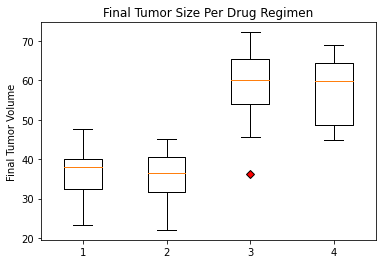

In [20]:
# Plot boxplots
# Refit data from dataframes into 2D array
obsArray = [capdf["Final Tumor Volume"],ramdf["Final Tumor Volume"],infdf["Final Tumor Volume"],cefdf["Final Tumor Volume"]]

fig2, ax2 = plt.subplots()
ax2.set_title('Final Tumor Size Per Drug Regimen')
ax2.set_ylabel('Final Tumor Volume')
red_diamond = dict(markerfacecolor='r', marker='D')
ax2.boxplot(obsArray, flierprops = red_diamond)
plt.show()

In [21]:
# Select a mouse that was treated with Capomulin and generate a line plot of tumor volume vs. time point 
# for that mouse.
capSingledf = mergeDataClean.loc[mergeDataClean["Mouse ID"] == "b128",:]
capSingledf

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
472,b128,5,45.651331,0,Capomulin,Female,9,22
679,b128,10,43.270852,0,Capomulin,Female,9,22
719,b128,15,43.784893,0,Capomulin,Female,9,22
933,b128,20,42.731552,0,Capomulin,Female,9,22
1268,b128,25,43.262145,1,Capomulin,Female,9,22
1400,b128,30,40.605335,1,Capomulin,Female,9,22
1547,b128,35,37.967644,1,Capomulin,Female,9,22
1629,b128,40,38.379726,2,Capomulin,Female,9,22
1764,b128,45,38.982878,2,Capomulin,Female,9,22


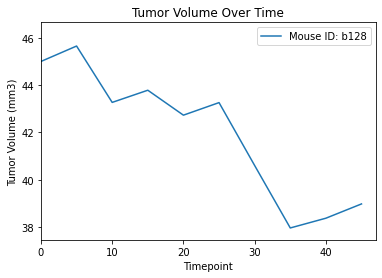

In [22]:
capSingleline, = plt.plot(capSingledf["Timepoint"], capSingledf["Tumor Volume (mm3)"], label="Mouse ID: b128")

plt.title("Tumor Volume Over Time")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(0, max(capSingledf["Timepoint"]) + 2)
plt.ylim(min(capSingledf["Tumor Volume (mm3)"]) - 0.5 , max(capSingledf["Tumor Volume (mm3)"]) + 1)

plt.legend(handles=[capSingleline], loc="best")
plt.show()


#world_avg, = plt.plot(years, average_unemployment, color="blue", label="World Average" )			
#country_one, = plt.plot(years, combined_unemployed_data.loc['USA',["2010","2011","2012","2013","2014"]], 			
#                        color="green",label=combined_unemployed_data.loc['USA',"Country Name"])			
#plt.legend(handles=[world_avg, country_one], loc="best")			
#plt.show()


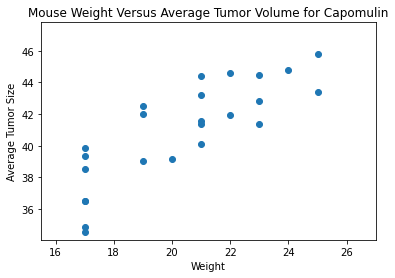

In [42]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.
capAlldf = mergeDataClean.loc[mergeDataClean["Drug Regimen"] == "Capomulin",:]
# Find average tumor volume per mouse
capAllGrouped = capAlldf.groupby("Mouse ID")
capAvgVol = capAllGrouped["Tumor Volume (mm3)"].mean()
capWeight = capAllGrouped["Weight (g)"].unique().astype(int)

plt.scatter(capWeight,capAvgVol)
plt.title("Mouse Weight Versus Average Tumor Volume for Capomulin")
plt.xlabel("Weight")
plt.ylabel("Average Tumor Size")
plt.xlim(min(capWeight) + 0.5, max(capWeight) + 2)
plt.ylim(min(capAvgVol) - 0.5 , max(capAvgVol) + 2)
plt.show()

The correlation between Mouse Weight and Average Tumor Volume for Capomulin is: 0.84.


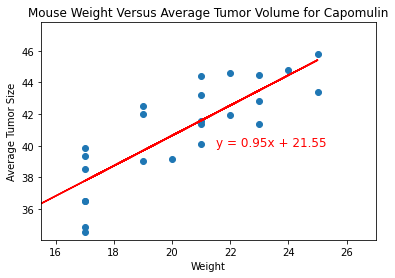

In [51]:
# Calculate the correlation coefficient and linear regression model between mouse weight and 
#average tumor volume for the Capomulin treatment. Plot the linear regression model on top of 
#the previous scatter plot.
correlation = st.pearsonr(capWeight,capAvgVol)
print(f'The correlation between Mouse Weight and Average Tumor Volume for \
Capomulin is: {round(correlation[0],2)}.')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capWeight, capAvgVol)
regress_values = capWeight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(capWeight,capAvgVol)
plt.plot(capWeight,regress_values,"r-")
plt.annotate(line_eq,(21.5,40),fontsize=12,color="red")
plt.title("Mouse Weight Versus Average Tumor Volume for Capomulin")
plt.xlabel("Weight")
plt.ylabel("Average Tumor Size")
plt.xlim(min(capWeight) + 0.5, max(capWeight) + 2)
plt.ylim(min(capAvgVol) - 0.5 , max(capAvgVol) + 2)
plt.show()
